<a href="https://colab.research.google.com/github/nutapol97/Python-for-DS-AI_Nutapol_T./blob/main/Supervised_Learning_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regression

import library and get dataset to X ,y in right shape.

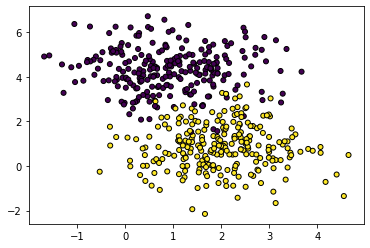

In [1]:
from sklearn import linear_model
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import default_rng

X, y = make_blobs(n_samples=500, centers=2, n_features=2,
                  random_state=0)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

Feature scale your data to reach faster convergence 

Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

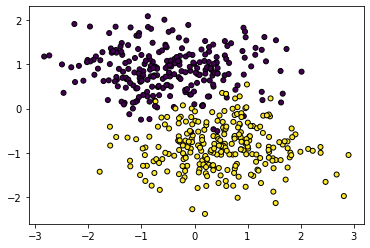

In [2]:
# feature scaling helps reaching convergence faster
scaler = StandardScaler()
X = scaler.fit_transform(X)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

split your data

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [4]:
np.shape(X_train) # just check shape of Train 

(350, 2)

In [20]:
def mini_batch(X_train,y_train,sizing):
      rng = default_rng()     # function random not replace number
      random_np=rng.choice(X_train.shape[0], size=sizing, replace=False)
      #random_np= np.random.randint(X_train.shape[0],size=sizing)
      X_train=X_train[random_np,:]
      y_train=y_train[random_np]
      return X_train,y_train


In [ ]:
def mini_batchGD(X_train,y_train,sizing):
      rng = default_rng()     # function random not replace number
      random_np=rng.choice(X_train.shape[0], size=sizing, replace=False)
      #random_np= np.random.randint(X_train.shape[0],size=sizing)
      X_train=X_train[random_np,:]
      y_train=y_train[random_np]
      
      return X_train,y_train

In [21]:
X_train,y_train=mini_batch(X_train,y_train,200)

In [ ]:
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)  # add intercept
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)  # add intercept


In [36]:
# here I use mini-batch as a demonstration
# you are free to use any variants of gradient descent
def mini_batch_GD(X, y, max_iter=1000):
    w = np.zeros(X.shape[1])
    print(X.shape[1])
    l_rate = 0.01
    #10% of data
    batch_size = int(0.1 * X.shape[0])
    for i in range(max_iter):
        ix = np.random.randint(0, X.shape[0]) #<----with replacement
        batch_X = X[ix:ix+batch_size]
        
        batch_y = y[ix:ix+batch_size]
        cost, grad = gradient(batch_X, batch_y, w)
        if i % 500 == 0:
            print(f"Cost at iteration {i}", cost)
        w = w - l_rate * grad
    return w, i

In [37]:
def gradient(X, y, w):
    m = X.shape[0]
    h = h_theta(X, w)
    error = h - y
    # putting negative sign for negative log likelihood
    cost = - np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    grad = np.dot(X.T, error)
    return cost, grad

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
        
def h_theta(X, w):
    return sigmoid(X @ w)

def output(pred):
    return np.round(pred)

w, i = mini_batch_GD(X_train, y_train, max_iter=5000)

5
Cost at iteration 0 13.862943611198906
Cost at iteration 500 1.4318600097950145
Cost at iteration 1000 0.8881118522855794
Cost at iteration 1500 0.6286672513926126
Cost at iteration 2000 0.20653189214098433
Cost at iteration 2500 1.7057432751654285
Cost at iteration 3000 1.7796546581312975
Cost at iteration 3500 1.0951770780803396
Cost at iteration 4000 1.5237182845953836
Cost at iteration 4500 0.2528272488423186


In [9]:
yhat = output(h_theta(X_test, w))
yhat

array([0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1.])

In [10]:
from sklearn.metrics import classification_report
print("=========Classification report=======")
print(classification_report(y_test, yhat))

=========Classification report=======
              precision    recall  f1-score   support

           0       0.99      0.89      0.94        75
           1       0.90      0.99      0.94        75

    accuracy                           0.94       150
   macro avg       0.94      0.94      0.94       150
weighted avg       0.94      0.94      0.94       150



In [11]:
from sklearn.metrics import roc_auc_score
print("=========ROC AUC score=======")
print(roc_auc_score(y_test, yhat))

=========ROC AUC score=======
0.9400000000000001


In [12]:
from sklearn.metrics import average_precision_score
print("=========Average precision score=======")
print(average_precision_score(y_test, yhat))

=========Average precision score=======
0.8970731707317074


In [ ]:
class LogisticRegression:
  def __inti__(self, )